# Yeast mating pathway 
Author: Je-Hoon Song email: <song.jehoon@gmail.com>

In [1]:
# default settings for jupyter 
%reload_ext autoreload
%autoreload 2
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
import os 
import sys
import numpy as np 
import pandas as pd 
pd.set_option("display.max_columns", 100)
# print(pd.get_option("display.max_columns"))
from ohmyyeast import datasets
from ohmyyeast import engine 
# matplotlib 
import matplotlib
import matplotlib.pyplot as plt 

### Load Optimization Data

In [2]:
data_optsnu = datasets.load_optsnu()

In [3]:
data_pub = datasets.load_optpub()
res = data_pub.groupby('AID')['fVal'].agg(['mean','std'])
res2 = res.sort_values('mean').reset_index()

### Global fitness and regional analysis 

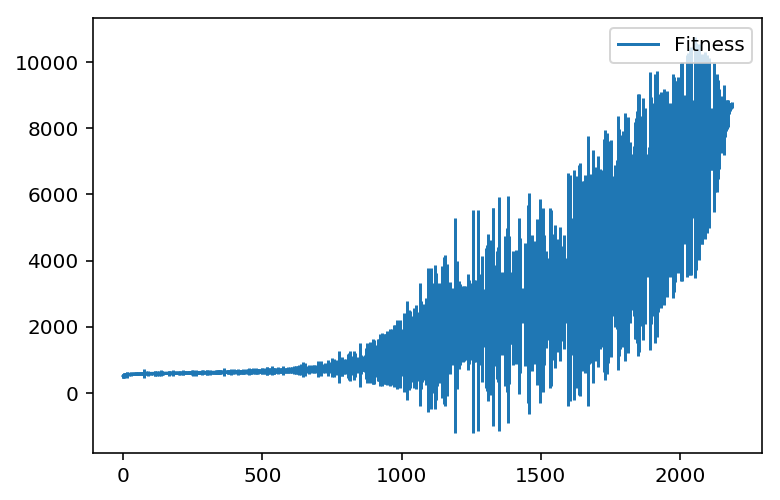

In [4]:
res3 = res2.rename(columns={'mean':'Fitness'})
res3.plot(y='Fitness',yerr='std')
# res3.plot(y=['Fitness'])

Now are studying about the core structures. 

In [5]:
def pattern_generator(k): 
    from itertools import combinations, permutations, product
    thr_corestrt = 650
    data_optsnu.columns
    data_optsnu.head()
    all_edges = ['e2','e3','e4','e5','e6','e7','e8','e9','e10']
    #unfixed_edges = ['e2','e3','e4','e6','e7','e9','e10']
    unfixed_edges = ['e2','e3','e4','e6','e7','e10']
    kstrlist = list()
    kstrlist_short = list() 
    for edge_key in combinations(unfixed_edges, k): 
        for edge_value in product([0,1,2], repeat=k):
            templ = {'e2':'*','e3':'*','e4':'*','e5':'1!','e6':'*','e7':'*','e8':'1!','e9':'*','e10':'*'}
            templ_short = {} 
            for ek, ev in zip(edge_key, edge_value):
                templ[ek] = ev 
                templ_short[ek] = ev 

            kstrlist.append(templ)
            kstrlist_short.append(templ_short)
    return kstrlist, kstrlist_short

In [6]:
def RelativeAppearance(data_optsnu,thr=650,K=3,target={'e3': 2, 'e6': 2}):
    targl = [(k,target[k]) for k in target]
    kstr, kstr_short = pattern_generator(K)
    # kstr_short[0:5]
    # pd.DataFrame(kstr).head(20)
    kstr_queries = [" and ".join([ x + ' == ' + str(xxx[x]) 
                                  for x in xxx]) 
          for xxx in kstr_short]
    kstr_meanfVal = [ {'Nin':(data_optsnu.query(kq).fVal < thr).sum(),
                       'Nout':(data_optsnu.query(kq).fVal >= thr).sum(),
                       'A_R':(data_optsnu.query(kq).fVal < thr).sum()/(
                           data_optsnu.query(kq).fVal >= thr).sum()
                      }  
                     for kq in kstr_queries]
    kstr_RelA = pd.DataFrame(kstr_meanfVal)
    kstr_RelA['kstr'] = kstr_short
    kstr_RelA['kstrl'] = kstr_RelA.kstr.apply(
        lambda x : [(k,x[k]) for k in x])
    kstr_RelA['kstr_score'] = kstr_RelA.kstrl.apply(
        lambda kstrl: len([k for k in kstrl if k in targl]))
    kstr_RelA = kstr_RelA.sort_values('A_R', ascending=False)
    kstr_RelA.drop(columns=['kstrl'], inplace=True)
    return kstr_RelA 

<img src="3node-structure.png" width=300>

### in case that K = 2

In [7]:
RelativeAppearance(data_optsnu,thr=500,K=2).head(10)

,A_R,Nin,Nout,kstr,kstr_score
52,0.014190,34,2396,"{'e4': 1, 'e3': 2}",1
104,0.012922,31,2399,"{'e4': 1, 'e10': 2}",0
80,0.012500,30,2400,"{'e3': 2, 'e10': 2}",1
10,0.012078,29,2401,"{'e4': 1, 'e2': 0}",0
38,0.012078,29,2401,"{'e2': 0, 'e10': 2}",0
2,0.011657,28,2402,"{'e3': 2, 'e2': 0}",1
86,0.007045,17,2413,"{'e4': 1, 'e6': 2}",1
93,0.007045,17,2413,"{'e4': 1, 'e7': 0}",0
62,0.006628,16,2414,"{'e3': 2, 'e6': 2}",2
69,0.006628,16,2414,"{'e7': 0, 'e3': 2}",1


In [8]:
RelativeAppearance(data_optsnu,thr=550,K=2).head(10)

,A_R,Nin,Nout,kstr,kstr_score
104,0.087248,195,2235,"{'e4': 1, 'e10': 2}",0
52,0.085306,191,2239,"{'e4': 1, 'e3': 2}",1
80,0.067194,153,2277,"{'e3': 2, 'e10': 2}",1
86,0.063923,146,2284,"{'e4': 1, 'e6': 2}",1
62,0.056522,130,2300,"{'e3': 2, 'e6': 2}",2
119,0.048770,113,2317,"{'e6': 0, 'e10': 2}",0
16,0.046963,109,2321,"{'e4': 1, 'e2': 2}",0
125,0.044712,104,2326,"{'e6': 2, 'e10': 2}",1
10,0.043366,101,2329,"{'e4': 1, 'e2': 0}",0
38,0.042024,98,2332,"{'e2': 0, 'e10': 2}",0


In [9]:
RelativeAppearance(data_optsnu,thr=600,K=2).head(10)

,A_R,Nin,Nout,kstr,kstr_score
62,0.488971,798,1632,"{'e3': 2, 'e6': 2}",2
80,0.485330,794,1636,"{'e3': 2, 'e10': 2}",1
125,0.471835,779,1651,"{'e6': 2, 'e10': 2}",1
74,0.368243,654,1776,"{'e3': 0, 'e10': 2}",0
44,0.358301,641,1789,"{'e2': 2, 'e10': 2}",0
78,0.340320,617,1813,"{'e3': 2, 'e10': 0}",1
134,0.330778,604,1826,"{'e7': 2, 'e10': 2}",0
119,0.309267,574,1856,"{'e6': 0, 'e10': 2}",0
71,0.283677,537,1893,"{'e7': 2, 'e3': 2}",1
38,0.276931,527,1903,"{'e2': 0, 'e10': 2}",0


In [10]:
RelativeAppearance(data_optsnu,thr=650,K=2).head(10)

,A_R,Nin,Nout,kstr,kstr_score
125,1.667398,1519,911,"{'e6': 2, 'e10': 2}",1
80,1.398815,1417,1013,"{'e3': 2, 'e10': 2}",1
62,1.309886,1378,1052,"{'e3': 2, 'e6': 2}",2
78,1.258364,1354,1076,"{'e3': 2, 'e10': 0}",1
123,1.135325,1292,1138,"{'e6': 2, 'e10': 0}",1
74,1.085837,1265,1165,"{'e3': 0, 'e10': 2}",0
44,1.001647,1216,1214,"{'e2': 2, 'e10': 2}",0
134,0.995074,1212,1218,"{'e7': 2, 'e10': 2}",0
119,0.937799,1176,1254,"{'e6': 0, 'e10': 2}",0
107,0.920949,1165,1265,"{'e4': 2, 'e10': 2}",0


In [11]:
RelativeAppearance(data_optsnu,thr=700,K=2).head(10)

,A_R,Nin,Nout,kstr,kstr_score
125,3.500000,1890,540,"{'e6': 2, 'e10': 2}",1
78,2.605341,1756,674,"{'e3': 2, 'e10': 0}",1
80,2.356354,1706,724,"{'e3': 2, 'e10': 2}",1
123,2.048934,1633,797,"{'e6': 2, 'e10': 0}",1
74,1.985258,1616,814,"{'e3': 0, 'e10': 2}",0
134,1.917167,1597,833,"{'e7': 2, 'e10': 2}",0
44,1.865566,1582,848,"{'e2': 2, 'e10': 2}",0
62,1.786697,1558,872,"{'e3': 2, 'e6': 2}",2
119,1.733408,1541,889,"{'e6': 0, 'e10': 2}",0
60,1.574153,1486,944,"{'e3': 2, 'e6': 0}",1


In [12]:
RelativeAppearance(data_optsnu,thr=750,K=2).head(10)

,A_R,Nin,Nout,kstr,kstr_score
125,6.210682,2093,337,"{'e6': 2, 'e10': 2}",1
134,3.700193,1913,517,"{'e7': 2, 'e10': 2}",0
80,3.308511,1866,564,"{'e3': 2, 'e10': 2}",1
78,3.218750,1854,576,"{'e3': 2, 'e10': 0}",1
74,2.900482,1807,623,"{'e3': 0, 'e10': 2}",0
44,2.851030,1799,631,"{'e2': 2, 'e10': 2}",0
119,2.744222,1781,649,"{'e6': 0, 'e10': 2}",0
123,2.670695,1768,662,"{'e6': 2, 'e10': 0}",1
107,2.379694,1711,719,"{'e4': 2, 'e10': 2}",0
101,2.000000,1620,810,"{'e4': 0, 'e10': 2}",0


### in case that K = 3 

In [13]:
RelativeAppearance(data_optsnu,thr=500,K=3).head(10)

,A_R,Nin,Nout,kstr,kstr_score
347,0.038462,30,780,"{'e4': 1, 'e3': 2, 'e10': 2}",1
167,0.037132,29,781,"{'e4': 1, 'e2': 0, 'e10': 2}",0
7,0.035806,28,782,"{'e4': 1, 'e3': 2, 'e2': 0}",1
89,0.035806,28,782,"{'e3': 2, 'e2': 0, 'e10': 2}",1
497,0.020151,16,794,"{'e4': 1, 'e10': 2, 'e7': 0}",0
293,0.020151,16,794,"{'e4': 1, 'e3': 2, 'e6': 2}",2
318,0.020151,16,794,"{'e4': 1, 'e3': 2, 'e7': 0}",1
138,0.018868,15,795,"{'e4': 1, 'e2': 0, 'e7': 0}",0
245,0.018868,15,795,"{'e7': 0, 'e2': 0, 'e10': 2}",0
425,0.018868,15,795,"{'e7': 0, 'e3': 2, 'e10': 2}",1


In [14]:
RelativeAppearance(data_optsnu,thr=550,K=3).head(10)

,A_R,Nin,Nout,kstr,kstr_score
347,0.196455,133,677,"{'e4': 1, 'e3': 2, 'e10': 2}",1
293,0.175617,121,689,"{'e4': 1, 'e3': 2, 'e6': 2}",2
476,0.126565,91,719,"{'e4': 1, 'e6': 2, 'e10': 2}",1
7,0.117241,85,725,"{'e4': 1, 'e3': 2, 'e2': 0}",1
167,0.114168,83,727,"{'e4': 1, 'e2': 0, 'e10': 2}",0
470,0.114168,83,727,"{'e4': 1, 'e6': 0, 'e10': 2}",0
89,0.105048,77,733,"{'e3': 2, 'e2': 0, 'e10': 2}",1
185,0.100543,74,736,"{'e4': 1, 'e2': 2, 'e10': 2}",0
404,0.100543,74,736,"{'e3': 2, 'e6': 2, 'e10': 2}",2
503,0.096076,71,739,"{'e4': 1, 'e10': 2, 'e7': 2}",0


In [15]:
RelativeAppearance(data_optsnu,thr=600,K=3).head(10)

,A_R,Nin,Nout,kstr,kstr_score
404,0.995074,404,406,"{'e3': 2, 'e6': 2, 'e10': 2}",2
402,0.942446,393,417,"{'e3': 2, 'e6': 2, 'e10': 0}",2
386,0.730769,342,468,"{'e3': 0, 'e6': 2, 'e10': 2}",1
101,0.629779,313,497,"{'e3': 0, 'e2': 2, 'e10': 2}",0
290,0.603960,305,505,"{'e4': 0, 'e3': 2, 'e6': 2}",2
242,0.585127,299,511,"{'e2': 2, 'e6': 2, 'e10': 2}",1
431,0.582031,298,512,"{'e7': 2, 'e3': 2, 'e10': 2}",1
89,0.578947,297,513,"{'e3': 2, 'e2': 0, 'e10': 2}",1
398,0.563707,292,518,"{'e3': 2, 'e6': 0, 'e10': 2}",1
376,0.548757,287,523,"{'e7': 1, 'e3': 2, 'e6': 2}",2


In [16]:
RelativeAppearance(data_optsnu,thr=650,K=3).head(10)

,A_R,Nin,Nout,kstr,kstr_score
402,7.901099,719,91,"{'e3': 2, 'e6': 2, 'e10': 0}",2
404,4.294118,657,153,"{'e3': 2, 'e6': 2, 'e10': 2}",2
386,3.655172,636,174,"{'e3': 0, 'e6': 2, 'e10': 2}",1
485,2.648649,588,222,"{'e4': 2, 'e6': 2, 'e10': 2}",1
398,2.476395,577,233,"{'e3': 2, 'e6': 0, 'e10': 2}",1
242,2.279352,563,247,"{'e2': 2, 'e6': 2, 'e10': 2}",1
431,1.945455,535,275,"{'e7': 2, 'e3': 2, 'e10': 2}",1
467,1.934783,534,276,"{'e4': 0, 'e6': 2, 'e10': 2}",1
396,1.852113,526,284,"{'e3': 2, 'e6': 0, 'e10': 0}",1
536,1.812500,522,288,"{'e7': 1, 'e6': 2, 'e10': 2}",1


In [17]:
RelativeAppearance(data_optsnu,thr=700,K=3).head(10)

,A_R,Nin,Nout,kstr,kstr_score
402,72.636364,799,11,"{'e3': 2, 'e6': 2, 'e10': 0}",2
396,17.837209,767,43,"{'e3': 2, 'e6': 0, 'e10': 0}",1
386,13.210526,753,57,"{'e3': 0, 'e6': 2, 'e10': 2}",1
404,11.857143,747,63,"{'e3': 2, 'e6': 2, 'e10': 2}",2
398,6.714286,705,105,"{'e3': 2, 'e6': 0, 'e10': 2}",1
242,6.105263,696,114,"{'e2': 2, 'e6': 2, 'e10': 2}",1
429,6.105263,696,114,"{'e7': 2, 'e3': 2, 'e10': 0}",1
485,6.043478,695,115,"{'e4': 2, 'e6': 2, 'e10': 2}",1
467,5.044776,676,134,"{'e4': 0, 'e6': 2, 'e10': 2}",1
431,4.664336,667,143,"{'e7': 2, 'e3': 2, 'e10': 2}",1


In [18]:
RelativeAppearance(data_optsnu,thr=700,K=3).head(10)

,A_R,Nin,Nout,kstr,kstr_score
402,72.636364,799,11,"{'e3': 2, 'e6': 2, 'e10': 0}",2
396,17.837209,767,43,"{'e3': 2, 'e6': 0, 'e10': 0}",1
386,13.210526,753,57,"{'e3': 0, 'e6': 2, 'e10': 2}",1
404,11.857143,747,63,"{'e3': 2, 'e6': 2, 'e10': 2}",2
398,6.714286,705,105,"{'e3': 2, 'e6': 0, 'e10': 2}",1
242,6.105263,696,114,"{'e2': 2, 'e6': 2, 'e10': 2}",1
429,6.105263,696,114,"{'e7': 2, 'e3': 2, 'e10': 0}",1
485,6.043478,695,115,"{'e4': 2, 'e6': 2, 'e10': 2}",1
467,5.044776,676,134,"{'e4': 0, 'e6': 2, 'e10': 2}",1
431,4.664336,667,143,"{'e7': 2, 'e3': 2, 'e10': 2}",1


### in case that K = 4

In [19]:
RelativeAppearance(data_optsnu,thr=500,K=4).head(10)

,A_R,Nin,Nout,kstr,kstr_score
185,0.115702,28,242,"{'e4': 1, 'e3': 2, 'e2': 0, 'e10': 2}",1
659,0.058824,15,255,"{'e4': 1, 'e10': 2, 'e2': 0, 'e7': 0}",0
1037,0.058824,15,255,"{'e4': 1, 'e10': 2, 'e3': 2, 'e7': 0}",1
425,0.054688,14,256,"{'e7': 0, 'e3': 2, 'e2': 0, 'e10': 2}",1
956,0.054688,14,256,"{'e4': 1, 'e3': 2, 'e6': 0, 'e10': 2}",1
102,0.054688,14,256,"{'e4': 1, 'e3': 2, 'e2': 0, 'e7': 0}",1
584,0.050584,13,257,"{'e4': 1, 'e2': 0, 'e6': 2, 'e10': 2}",1
578,0.046512,12,258,"{'e4': 1, 'e2': 0, 'e6': 0, 'e10': 2}",0
23,0.046512,12,258,"{'e4': 1, 'e3': 2, 'e2': 0, 'e6': 2}",2
344,0.046512,12,258,"{'e3': 2, 'e2': 0, 'e6': 0, 'e10': 2}",1


In [20]:
RelativeAppearance(data_optsnu,thr=550,K=4).head(10)

,A_R,Nin,Nout,kstr,kstr_score
962,0.336634,68,202,"{'e4': 1, 'e3': 2, 'e6': 2, 'e10': 2}",2
185,0.330049,67,203,"{'e4': 1, 'e3': 2, 'e2': 0, 'e10': 2}",1
960,0.244240,53,217,"{'e4': 1, 'e3': 2, 'e6': 2, 'e10': 0}",2
880,0.227273,50,220,"{'e4': 1, 'e3': 2, 'e6': 2, 'e7': 1}",2
23,0.221719,49,221,"{'e4': 1, 'e3': 2, 'e2': 0, 'e6': 2}",2
1037,0.221719,49,221,"{'e4': 1, 'e10': 2, 'e3': 2, 'e7': 0}",1
956,0.216216,48,222,"{'e4': 1, 'e3': 2, 'e6': 0, 'e10': 2}",1
1043,0.205357,46,224,"{'e4': 1, 'e10': 2, 'e3': 2, 'e7': 2}",1
632,0.189427,43,227,"{'e4': 1, 'e2': 2, 'e6': 0, 'e10': 2}",0
584,0.173913,40,230,"{'e4': 1, 'e2': 0, 'e6': 2, 'e10': 2}",1


In [21]:
RelativeAppearance(data_optsnu,thr=600,K=4).head(10)

,A_R,Nin,Nout,kstr,kstr_score
951,1.368421,156,114,"{'e4': 0, 'e3': 2, 'e6': 2, 'e10': 0}",2
917,1.368421,156,114,"{'e4': 2, 'e3': 0, 'e6': 2, 'e10': 2}",1
386,1.268908,151,119,"{'e3': 0, 'e2': 2, 'e6': 2, 'e10': 2}",1
953,1.213115,148,122,"{'e4': 0, 'e3': 2, 'e6': 2, 'e10': 2}",2
1130,1.177419,146,124,"{'e7': 1, 'e3': 2, 'e6': 2, 'e10': 2}",2
350,1.142857,144,126,"{'e3': 2, 'e2': 0, 'e6': 2, 'e10': 2}",2
402,1.093023,141,129,"{'e3': 2, 'e2': 2, 'e6': 2, 'e10': 0}",2
1128,1.093023,141,129,"{'e7': 1, 'e3': 2, 'e6': 2, 'e10': 0}",2
962,1.061069,139,131,"{'e4': 1, 'e3': 2, 'e6': 2, 'e10': 2}",2
1127,0.985294,134,136,"{'e7': 0, 'e3': 2, 'e6': 2, 'e10': 2}",2


In [22]:
RelativeAppearance(data_optsnu,thr=650,K=4).head(10)

,A_R,Nin,Nout,kstr,kstr_score
951,17.000000,255,15,"{'e4': 0, 'e3': 2, 'e6': 2, 'e10': 0}",2
917,14.000000,252,18,"{'e4': 2, 'e3': 0, 'e6': 2, 'e10': 2}",1
1131,9.800000,245,25,"{'e7': 2, 'e3': 2, 'e6': 2, 'e10': 0}",2
969,9.800000,245,25,"{'e4': 2, 'e3': 2, 'e6': 2, 'e10': 0}",2
953,9.800000,245,25,"{'e4': 0, 'e3': 2, 'e6': 2, 'e10': 2}",2
1125,9.384615,244,26,"{'e7': 0, 'e3': 2, 'e6': 2, 'e10': 0}",2
402,8.310345,241,29,"{'e3': 2, 'e2': 2, 'e6': 2, 'e10': 0}",2
348,7.709677,239,31,"{'e3': 2, 'e2': 0, 'e6': 2, 'e10': 0}",2
375,7.709677,239,31,"{'e3': 2, 'e2': 1, 'e6': 2, 'e10': 0}",2
386,7.437500,238,32,"{'e3': 0, 'e2': 2, 'e6': 2, 'e10': 2}",1


In [23]:
RelativeAppearance(data_optsnu,thr=700,K=4).head(10)

,A_R,Nin,Nout,kstr,kstr_score
402,269.0,269,1,"{'e3': 2, 'e2': 2, 'e6': 2, 'e10': 0}",2
951,269.0,269,1,"{'e4': 0, 'e3': 2, 'e6': 2, 'e10': 0}",2
348,134.0,268,2,"{'e3': 2, 'e2': 0, 'e6': 2, 'e10': 0}",2
1128,134.0,268,2,"{'e7': 1, 'e3': 2, 'e6': 2, 'e10': 0}",2
1131,89.0,267,3,"{'e7': 2, 'e3': 2, 'e6': 2, 'e10': 0}",2
969,66.5,266,4,"{'e4': 2, 'e3': 2, 'e6': 2, 'e10': 0}",2
1125,44.0,264,6,"{'e7': 0, 'e3': 2, 'e6': 2, 'e10': 0}",2
917,44.0,264,6,"{'e4': 2, 'e3': 0, 'e6': 2, 'e10': 2}",1
960,44.0,264,6,"{'e4': 1, 'e3': 2, 'e6': 2, 'e10': 0}",2
915,44.0,264,6,"{'e4': 2, 'e3': 0, 'e6': 2, 'e10': 0}",1


## General 3-node model for Mating Pathway: 

### SNU & Public Data Loading 

In [24]:
### 4.21 11:30

In [25]:
# import tellurium

/usr/local/lib/python3.5/dist-packages/tellurium/tellurium.py:40: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/pla

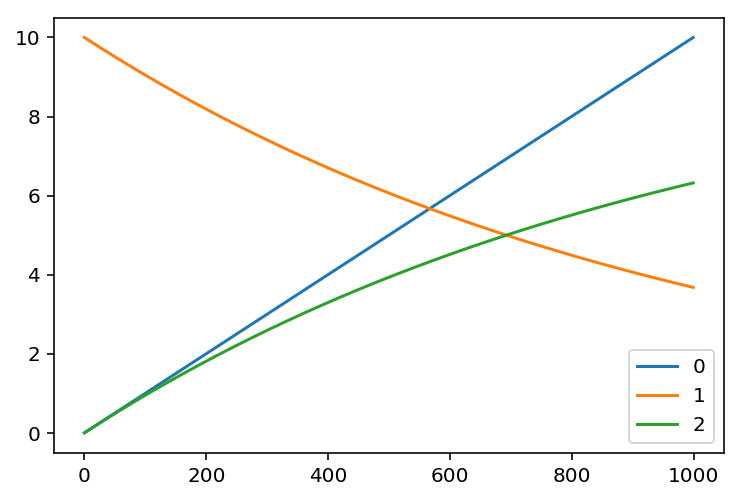

In [26]:
import tellurium as te
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
res = r.simulate(0, 10, 1000)
df0 = pd.DataFrame(res)
df0.plot()